In [1]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train=pd.read_csv(r"C:\Users\HP\Desktop\hackathon\zelextra  x aws\samiul dataset\train.csv")
data_test=pd.read_csv(r"C:\Users\HP\Desktop\hackathon\zelextra  x aws\samiul dataset\test.csv")
sample_submission = pd.read_csv(r"C:\Users\HP\Desktop\hackathon\zelextra  x aws\samiul dataset\sample_submission.csv")

In [3]:
data_train

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,Power,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308671,32.135501,4.0,0.803199,37.403527,1.963787,73.452561,13.691147,62.494044,12.82491203,1018.866505,A1,NaN,tracking,0.562096
1,1,24.785727,240.003973,1.359648277,19.977460,8.0,0.479456,21.843315,0.241473,5.274577,27.545096,43.851238,12.01204366,1025.623854,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536838,1.496401,4.0,0.822398,48.222882,4.191800,202.140686,43.363708,NaN,1.814399756,1010.922654,C3,E00,tracking,0.573776
3,3,53.339567,735.141179,96.19095521,18.491582,3.0,0.837529,46.295748,0.960567,44.470168,57.720436,67.361473,8.736258932,1021.846663,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,0.000000,6.786263,3.632000,0.522683841,1008.555958,B2,E00,fixed,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,43995,40.581656,492.446562,35.49601213,4.508170,8.0,NaN,40.883724,3.434505,140.415374,48.476050,14.015174,3.135128145,1008.966267,D4,E00,tracking,0.543334
43996,43996,16.958524,198.844667,4.063816084,4.021203,4.0,0.810999,0.000000,1.290352,0.000000,23.502657,22.788465,9.363423993,1023.566458,C3,E02,tracking,0.469058
43997,43997,24.055333,757.621634,2.797669861,15.253932,3.0,NaN,5.855590,4.835729,28.316048,31.908375,98.197373,14.35594538,1011.665828,A1,E00,tracking,0.607146
43998,43998,15.623725,177.376256,0.671049097,16.437613,2.0,0.861087,0.000000,1.159060,0.000000,23.835495,9.581184,6.958664885,1017.657263,B2,NaN,dual-axis,0.439482


In [4]:
data_train.dtypes

id                      int64
temperature           float64
irradiance            float64
humidity               object
panel_age             float64
maintenance_count     float64
soiling_ratio         float64
voltage               float64
current               float64
Power                 float64
module_temperature    float64
cloud_coverage        float64
wind_speed             object
pressure               object
string_id              object
error_code             object
installation_type      object
efficiency            float64
dtype: object

In [5]:
for col in ['humidity', 'wind_speed', 'pressure']:
    data_train[col] = pd.to_numeric(data_train[col], errors='coerce')
    data_test[col] = pd.to_numeric(data_test[col], errors='coerce')

In [6]:
data_train.fillna(data_train.median(numeric_only=True), inplace=True)
data_test.fillna(data_test.median(numeric_only=True), inplace=True)


In [7]:
data_train

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,Power,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,73.452561,13.691147,62.494044,12.824912,1018.866505,A1,NaN,tracking,0.562096
1,1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,5.274577,27.545096,43.851238,12.012044,1025.623854,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,202.140686,43.363708,49.750932,1.814400,1010.922654,C3,E00,tracking,0.573776
3,3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,44.470168,57.720436,67.361473,8.736259,1021.846663,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,0.000000,6.786263,3.632000,0.522684,1008.555958,B2,E00,fixed,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,43995,40.581656,492.446562,35.496012,4.508170,8.0,0.697574,40.883724,3.434505,140.415374,48.476050,14.015174,3.135128,1008.966267,D4,E00,tracking,0.543334
43996,43996,16.958524,198.844667,4.063816,4.021203,4.0,0.810999,0.000000,1.290352,0.000000,23.502657,22.788465,9.363424,1023.566458,C3,E02,tracking,0.469058
43997,43997,24.055333,757.621634,2.797670,15.253932,3.0,0.697574,5.855590,4.835729,28.316048,31.908375,98.197373,14.355945,1011.665828,A1,E00,tracking,0.607146
43998,43998,15.623725,177.376256,0.671049,16.437613,2.0,0.861087,0.000000,1.159060,0.000000,23.835495,9.581184,6.958665,1017.657263,B2,NaN,dual-axis,0.439482


In [ ]:
'''cat_cols = ['string_id', 'error_code', 'installation_type']
for col in cat_cols:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    data_test[col] = le.transform(data_test[col])'''

ValueError: y contains previously unseen labels: nan

In [9]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['string_id', 'error_code', 'installation_type']
for col in cat_cols:
    le = LabelEncoder()
    
    # Fill missing values with a placeholder BEFORE fitting
    data_train[col] = data_train[col].astype(str).fillna("missing")
    data_test[col] = data_test[col].astype(str).fillna("missing")

    # Fit on training data
    le.fit(data_train[col])

    # Transform both
    data_train[col] = le.transform(data_train[col])
    data_test[col] = data_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)


In [10]:
data_train.isnull().sum()

id                    0
temperature           0
irradiance            0
humidity              0
panel_age             0
maintenance_count     0
soiling_ratio         0
voltage               0
current               0
Power                 0
module_temperature    0
cloud_coverage        0
wind_speed            0
pressure              0
string_id             0
error_code            0
installation_type     0
efficiency            0
dtype: int64

In [11]:
data_train=data_train.drop('id', axis=1)

In [12]:
data_train

,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,Power,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,73.452561,13.691147,62.494044,12.824912,1018.866505,0,3,2,0.562096
1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,5.274577,27.545096,43.851238,12.012044,1025.623854,3,0,0,0.396447
2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,202.140686,43.363708,49.750932,1.814400,1010.922654,2,0,2,0.573776
3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,44.470168,57.720436,67.361473,8.736259,1021.846663,0,3,0,0.629009
4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,0.000000,6.786263,3.632000,0.522684,1008.555958,1,0,1,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,40.581656,492.446562,35.496012,4.508170,8.0,0.697574,40.883724,3.434505,140.415374,48.476050,14.015174,3.135128,1008.966267,3,0,2,0.543334
43996,16.958524,198.844667,4.063816,4.021203,4.0,0.810999,0.000000,1.290352,0.000000,23.502657,22.788465,9.363424,1023.566458,2,2,2,0.469058
43997,24.055333,757.621634,2.797670,15.253932,3.0,0.697574,5.855590,4.835729,28.316048,31.908375,98.197373,14.355945,1011.665828,0,0,2,0.607146
43998,15.623725,177.376256,0.671049,16.437613,2.0,0.861087,0.000000,1.159060,0.000000,23.835495,9.581184,6.958665,1017.657263,1,3,0,0.439482


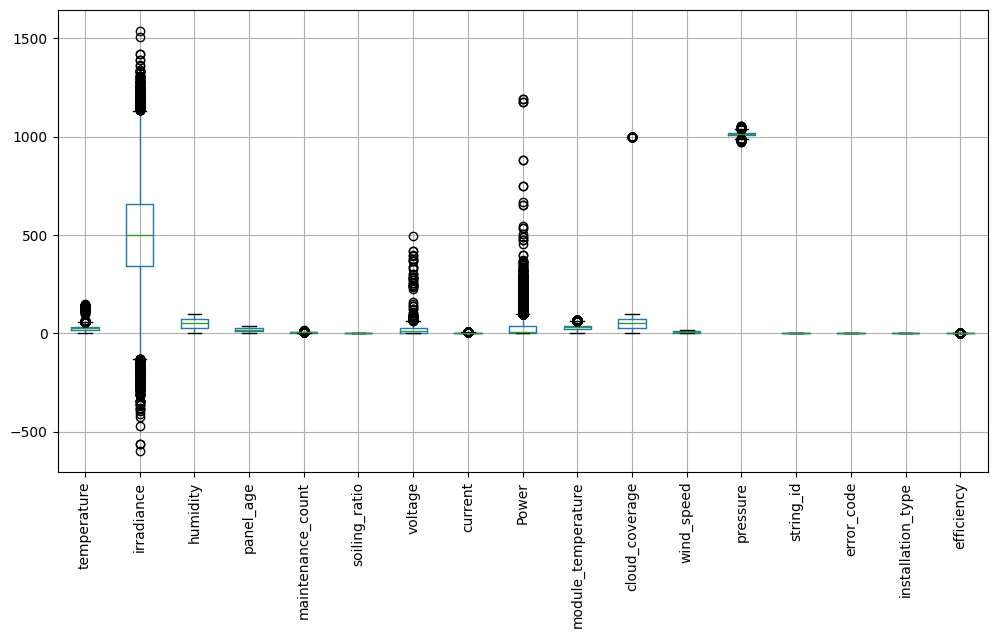

In [13]:
data_train.select_dtypes(include='number').boxplot(figsize=(12,6))
plt.xticks(rotation=90)
plt.show()

In [14]:
data_train[['irradiance', 'efficiency']].corr()


,irradiance,efficiency
irradiance,1.000000,0.670173
efficiency,0.670173,1.000000


Skewness:
 cloud_coverage        12.884597
Power                  4.560010
voltage                4.371528
temperature            0.872122
current                0.702810
maintenance_count      0.519933
module_temperature     0.086935
soiling_ratio          0.009217
wind_speed             0.007310
error_code             0.004463
humidity               0.001328
panel_age              0.001218
irradiance            -0.000246
string_id             -0.009601
pressure              -0.028644
installation_type     -0.219773
efficiency            -0.808214
dtype: float64


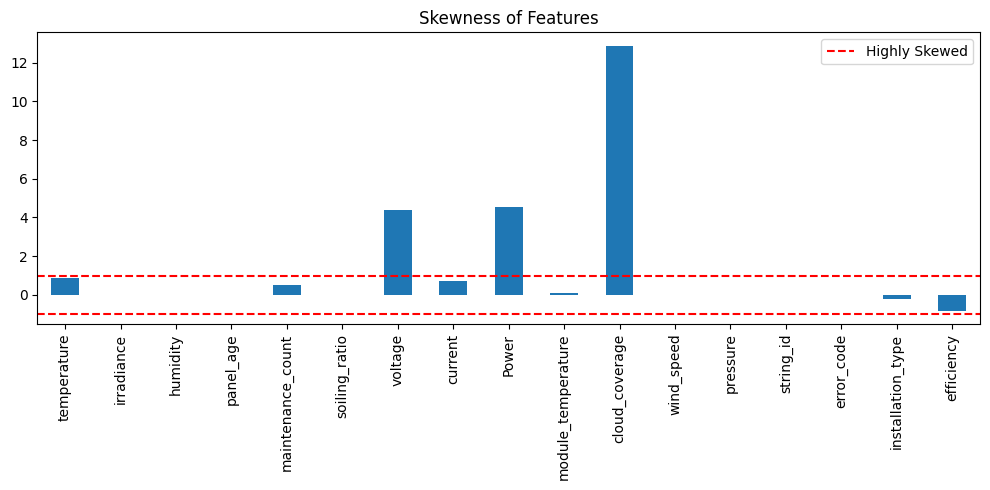


Correlation Matrix:
                     temperature  irradiance  humidity  panel_age  \
temperature            1.000000    0.008078 -0.003933  -0.006546   
irradiance             0.008078    1.000000 -0.001744  -0.009250   
humidity              -0.003933   -0.001744  1.000000   0.006100   
panel_age             -0.006546   -0.009250  0.006100   1.000000   
maintenance_count     -0.004435   -0.008902 -0.011808   0.000727   
soiling_ratio          0.001583   -0.009240  0.000491  -0.004659   
voltage               -0.004240    0.237495 -0.008181   0.007205   
current                0.002187    0.433741 -0.002928   0.000580   
Power                 -0.001255    0.347921 -0.002310   0.004074   
module_temperature     0.880291    0.008313 -0.002621  -0.006815   
cloud_coverage         0.004176   -0.006992  0.008050  -0.002815   
wind_speed            -0.002103   -0.009302  0.002029   0.003944   
pressure              -0.001422   -0.008725  0.004605  -0.003986   
string_id             -0.0

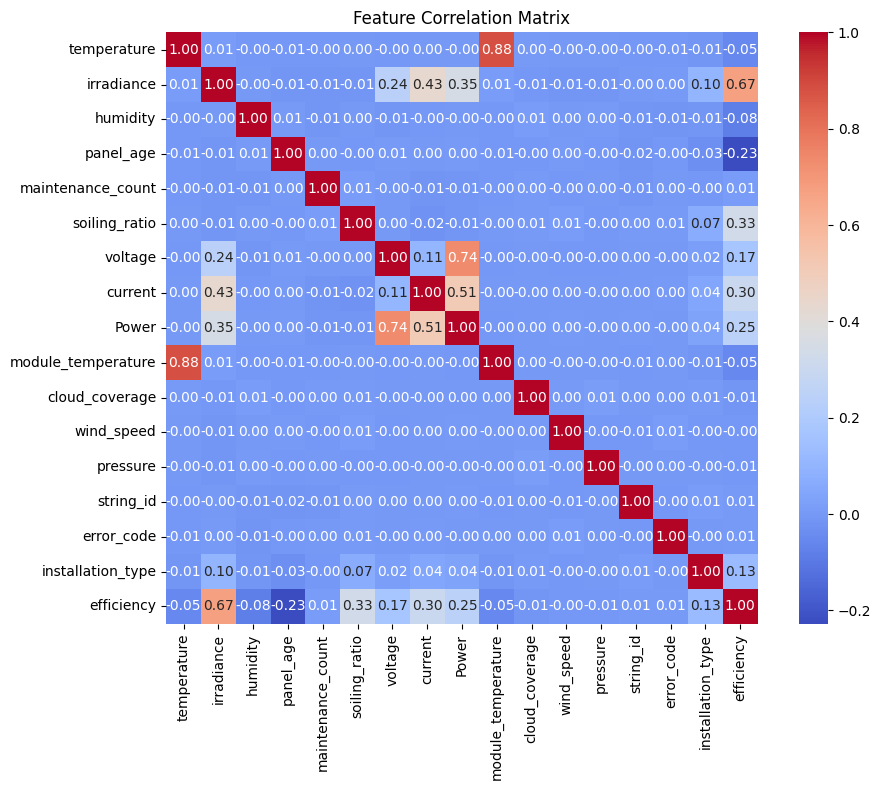

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check skewness
skewness = data_train.skew(numeric_only=True)
print("Skewness:\n", skewness.sort_values(ascending=False))

# Plot skewness
skewness.plot(kind='bar', figsize=(10, 5), title="Skewness of Features")
plt.axhline(1, color='r', linestyle='--', label='Highly Skewed')
plt.axhline(-1, color='r', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# Check correlation matrix
corr_matrix = data_train.corr(numeric_only=True)

# Display correlation matrix
print("\nCorrelation Matrix:\n", corr_matrix)

# Heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


In [16]:
data_train['cloud_coverage'] = np.log1p(data_train['cloud_coverage'])
data_test['cloud_coverage'] = np.log1p(data_test['cloud_coverage'])

data_train['Power']=data_train['voltage']/data_train['current']
data_test['Power']=data_test['voltage']/data_test['current']

In [17]:
data_train

,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,Power,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,19.046631,13.691147,4.150946,12.824912,1018.866505,0,3,2,0.562096
1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,90.458515,27.545096,3.803351,12.012044,1025.623854,3,0,0,0.396447
2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,11.504098,43.363708,3.926930,1.814400,1010.922654,2,0,2,0.573776
3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,48.196272,57.720436,4.224809,8.736259,1021.846663,0,3,0,0.629009
4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,0.000000,6.786263,1.532989,0.522684,1008.555958,1,0,1,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,40.581656,492.446562,35.496012,4.508170,8.0,0.697574,40.883724,3.434505,11.903817,48.476050,2.709061,3.135128,1008.966267,3,0,2,0.543334
43996,16.958524,198.844667,4.063816,4.021203,4.0,0.810999,0.000000,1.290352,0.000000,23.502657,3.169201,9.363424,1023.566458,2,2,2,0.469058
43997,24.055333,757.621634,2.797670,15.253932,3.0,0.697574,5.855590,4.835729,1.210901,31.908375,4.597112,14.355945,1011.665828,0,0,2,0.607146
43998,15.623725,177.376256,0.671049,16.437613,2.0,0.861087,0.000000,1.159060,0.000000,23.835495,2.359077,6.958665,1017.657263,1,3,0,0.439482


In [18]:
X=data_train.drop("efficiency", axis=1)
y=data_train["efficiency"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
base_models = {
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

# STEP 3: Define parameter grids for RandomizedSearchCV
param_grids = {
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.7, 1.0],
        'colsample_bytree': [0.7, 1.0]
    },
    "CatBoost": {
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.03, 0.1],
        'iterations': [100, 200, 300],
        'l2_leaf_reg': [1, 3, 5],
        'border_count': [32, 64, 128]
    }
}

# STEP 4: RandomizedSearchCV tuning
tuned_models = {}

for name, model in base_models.items():
    print(f"\nTuning {name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=20,  # total random combinations to try
        scoring='neg_root_mean_squared_error',
        cv=3,
        random_state=42,
        n_jobs=-1
    )
    random_search.fit(X_train, y_train)
    tuned_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")


results = []


Tuning XGBoost...
Best parameters for XGBoost: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

Tuning CatBoost...
Best parameters for CatBoost: {'learning_rate': 0.03, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 8, 'border_count': 128}


In [21]:
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
for name, model in tuned_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse))
    print(f"Model: {name}, R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")

# STEP 5: Display sorted results
results_df = pd.DataFrame(results, columns=["Model", "R2_Score", "RMSE"])
print("\nSorted Results:")
print(results_df.sort_values(by="R2_Score", ascending=False))

Model: XGBoost, R2 Score: 0.6646, RMSE: 0.0675
Model: CatBoost, R2 Score: 0.6651, RMSE: 0.0674

Sorted Results:
      Model  R2_Score      RMSE
1  CatBoost  0.665078  0.067404
0   XGBoost  0.664582  0.067454


In [23]:
new_data_test=data_test.drop('id', axis=1)

In [24]:
new_data_test

,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,Power,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type
0,17.618379,85.449838,90.815423,13.910963,6.0,0.889765,6.370396,0.069101,92.189302,19.517274,3.541246,7.181958,1034.782455,2,1,-1
1,34.826323,722.801748,20.982993,20.916528,4.0,0.590372,30.095867,1.713852,17.560365,37.421443,3.506370,4.184582,992.319752,3,0,-1
2,33.776934,485.491998,55.614050,1.446962,3.0,0.611425,28.424430,1.696936,16.750441,32.147763,4.257219,6.259441,999.213457,3,1,-1
3,18.584189,350.022720,49.044766,18.810133,5.0,0.697455,7.848038,0.787188,9.969711,25.734118,3.781066,2.769607,1026.650078,2,2,-1
4,43.044908,437.295622,8.761571,17.402885,8.0,0.564938,12.300717,1.867620,6.586308,29.952897,3.951739,11.846974,1010.809943,1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,40.581656,492.446562,35.496012,4.508170,8.0,0.697455,40.883724,3.434505,11.903817,48.476050,2.709061,3.135128,1008.966267,3,0,-1
11996,16.958524,198.844667,4.063816,4.021203,4.0,0.810999,0.000000,1.290352,0.000000,23.502657,3.169201,9.363424,1023.566458,2,2,-1
11997,24.055333,757.621634,2.797670,15.253932,3.0,0.697455,5.855590,4.835729,1.210901,31.908375,4.597112,14.355945,1011.665828,0,0,-1
11998,15.623725,177.376256,0.671049,16.437613,2.0,0.861087,0.000000,1.159060,0.000000,23.835495,2.359077,6.958665,1017.657263,1,3,-1


In [25]:
print(new_data_test.shape)

(12000, 16)


In [32]:
y_pred = tuned_models["CatBoost"].predict(new_data_test)

In [28]:
y_pred

array([0.38887295, 0.53752402, 0.51293557, ..., 0.61106368, 0.44024682,
       0.54430749], shape=(12000,))

In [33]:
print(len(y_pred))

12000


In [34]:
print("Negative predictions:", (y_pred < 0).sum())

Negative predictions: 0


In [35]:

# Assuming:
# - y_pred contains your model's predictions
# - data_test is your original test DataFrame (before dropping 'id')
# - sample_submission is a DataFrame with correct column names and structure

submission = pd.DataFrame({
    'id': data_test['id'],            # Ensure you kept the 'id' column earlier
    'efficiency': y_pred              # Your model's predictions
})

# (Optional) Match the exact column order and names of sample_submission
submission = submission[sample_submission.columns]

# Save to CSV without index
submission.to_csv("20submission.csv", index=False)